#### Import the necessary libraries

In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the csv file and check shape, head to have a glance of the data

In [559]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 200
df = pd.read_csv("loan.csv", low_memory=False)
df.shape

(39717, 111)

#### Glance the data set

In [560]:
#Data set glance
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [561]:
df.shape

(39717, 111)

### Data Cleaning
#### 1. Find the columns with 40% + Nan Values. Analyze and drop if needed
#### 2. Find columns with no/ very low/very high unique values. Analyze and drop if needed
#### 3. Find all rows with 40% + Nan values. Analyze and drop them if needed

In [562]:
#find the % of NAN n each column
df.isna().sum().sort_values()/df.shape[0] * 100


id                                  0.000000
earliest_cr_line                    0.000000
inq_last_6mths                      0.000000
open_acc                            0.000000
pub_rec                             0.000000
revol_bal                           0.000000
total_acc                           0.000000
initial_list_status                 0.000000
out_prncp                           0.000000
out_prncp_inv                       0.000000
delinq_2yrs                         0.000000
total_pymnt                         0.000000
total_rec_int                       0.000000
total_rec_late_fee                  0.000000
recoveries                          0.000000
collection_recovery_fee             0.000000
last_pymnt_amnt                     0.000000
policy_code                         0.000000
application_type                    0.000000
acc_now_delinq                      0.000000
delinq_amnt                         0.000000
total_pymnt_inv                     0.000000
dti       

In [563]:
#Find columns with more than 40% of Null values
df.columns[df.isna().sum() > 0.40*df.shape[0]]

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [564]:
#Drop columns with more than 40% null values
df_after_dropped_cols = df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

In [565]:
#New shape after dropping the columns
df_after_dropped_cols.shape

(39717, 54)

In [566]:
df_after_dropped_cols.isna().sum().sort_values().tail(10)

title                            11
tax_liens                        39
revol_util                       50
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
last_pymnt_d                     71
pub_rec_bankruptcies            697
emp_length                     1075
emp_title                      2459
desc                          12940
dtype: int64

In [567]:
#Let's Analyze the Desc column . It's just the description and not in formatted way so can be dropped
df_after_dropped_cols.desc.value_counts().sort_values()

I muchly appreciate this loan i can guarantee i make the payments on time every month.this is something i need.thank you.                                                                                                                                                                                                                                      1
  Borrower added on 12/15/11 > I had recived a loan from Citi Financial about a year ago, I was paying 29.99 intrest, so the refinance is to cut that rate since cleaning up my credit I have been paying everything on time as shown on my credit report<br>                                                                                                  1
  Borrower added on 12/15/11 > Plan to pay off 2 charge accounts. I will close one of them and ask for a credit line decrease from the other. Also borrowed money from a friend and would like to pay that off.......<br><br>  Borrower added on 12/17/11 > The credit card that I am asking to be dec

In [568]:
#Let's Analyze the url column. URL column is unique for every record so can be dropped
df.url.nunique()

39717

In [569]:
#Let's drop the url and desc column because description is just some added strings and url is unique per record and won't be needed for analysis
df_after_dropped_cols = df_after_dropped_cols.drop(columns=["desc","url"])

In [570]:
pd.Series({col:df[col].unique() for col in df_after_dropped_cols})

id                            [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                     [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                     [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt_inv               [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
term                                                   [ 36 months,  60 months]
int_rate                      [10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...
installment                   [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
grade                                                     [B, C, A, E, F, D, G]
sub_grade                     [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title                     [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length                    [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                          

In [571]:
#drop these rows as the values are either same or nan. Member id and id can be dropped as these are just identifier and won't be helpful in making insights
#['tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',  'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan', 'member_id', 'id']
#grade and subgrade column also doesn't give much information
df_after_dropped_cols = df_after_dropped_cols.drop(columns= ['tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',  'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan', 'member_id', 'id', 'grade', 'sub_grade', 'emp_title', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
)


In [572]:
#terms is in month let's convert to numeric and remove string "months"
df_after_dropped_cols["term"] = df_after_dropped_cols.term.apply(lambda x: x.split(" ")[1]).astype('int64')

In [573]:
#int_rate is in % let's convert to float and remove string "%"
df_after_dropped_cols.int_rate=df_after_dropped_cols.int_rate.apply(lambda x: x[:-1]).astype('float64')

In [574]:
df_after_dropped_cols.shape

(39717, 34)

In [575]:
df_after_dropped_cols.total_rec_late_fee.value_counts()

0.000000      37671
15.000000       255
15.000000        58
30.000000        55
15.000000        47
15.000000        40
15.000000        33
15.000000        32
15.000000        25
15.000000        25
45.000000        17
15.000000        12
15.000000        11
15.000000        11
15.000000         8
30.000000         7
15.000000         7
30.000000         6
30.000000         6
30.000000         6
15.000000         5
30.000000         5
15.000000         4
30.000000         4
30.000000         4
60.000000         4
30.000000         4
30.000000         3
30.000000         3
45.000000         3
15.000000         3
18.870000         2
17.700000         2
30.000000         2
16.730000         2
15.000000         2
30.000000         2
30.000000         2
15.640000         2
14.919231         2
30.000000         2
15.790000         2
34.460000         2
48.390000         2
28.760000         2
16.780000         2
45.000000         2
16.960000         2
15.000000         2
20.652499         1


In [576]:

df_after_dropped_cols.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [577]:
df_after_dropped_cols.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000


#### Drop the columns with high > 0.9 correlation matrix

In [578]:
#Let's find the correlation matrix for each variable and sort it to see which has the highest.
corr = df_after_dropped_cols.corr().abs()
corr.unstack().sort_values(kind="quicksort")

pub_rec                  open_acc                   0.000172
open_acc                 pub_rec                    0.000172
total_pymnt_inv          total_rec_late_fee         0.000796
total_rec_late_fee       total_pymnt_inv            0.000796
dti                      inq_last_6mths             0.001405
inq_last_6mths           dti                        0.001405
total_rec_late_fee       pub_rec                    0.002071
pub_rec                  total_rec_late_fee         0.002071
delinq_2yrs              out_prncp                  0.003008
out_prncp                delinq_2yrs                0.003008
out_prncp_inv            delinq_2yrs                0.003203
delinq_2yrs              out_prncp_inv              0.003203
total_rec_late_fee       revol_bal                  0.003823
revol_bal                total_rec_late_fee         0.003823
pub_rec                  dti                        0.004621
dti                      pub_rec                    0.004621
out_prncp               

In [579]:
#dropping out_prncp, out_prncp_inv because it just shows how much principle is outstanding. It doesn't provide very meaninful insight.
#dropping loan_amnt,funded_amnt_inv as the data is very similar to funded_amnt
#total_rec_late_fee and recoveries can be dropped as it has 95%+ entries as 0
#total_rec_int','total_rec_prncp, total_pymnt,total_pymnt_inv, collection_recovery_fee  can be droppes as it's not giving much insight
df_after_dropped_cols = df_after_dropped_cols.drop(columns=["out_prncp","out_prncp_inv",'loan_amnt','funded_amnt_inv', 'total_rec_late_fee', 'recoveries', 'total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','collection_recovery_fee' ])
df_after_dropped_cols.shape

(39717, 23)

In [580]:
df_after_dropped_cols.describe()

,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,10947.713196,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828
std,7187.238670,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709
min,500.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5400.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000
50%,9600.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000
75%,15000.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000
max,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000


In [581]:
df_after_dropped_cols.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9
1,2500,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4
2,2400,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10
3,10000,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37
4,3000,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38


In [582]:
#Let's find the rows which has more than 60% of non-null vales. We will be dropping the remaining rows. In this case we got all the rows having more than 60% non-null values so we won't drop anything.
len(df_after_dropped_cols.dropna(thresh=0.6*df_after_dropped_cols.shape[1], axis=0))


39717

In [583]:
df_after_dropped_cols.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,36,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9
1,2500,60,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4
2,2400,36,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10
3,10000,36,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37
4,3000,60,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38


In [ ]:
#Should we drop zipcode/addr_state?

In [584]:
df_after_dropped_cols.zip_code.value_counts().head(200)

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
900xx    453
021xx    397
300xx    394
926xx    371
750xx    367
941xx    356
331xx    349
917xx    348
921xx    346
770xx    321
117xx    303
113xx    284
852xx    279
913xx    278
891xx    255
330xx    255
080xx    244
925xx    237
902xx    235
334xx    234
201xx    229
920xx    228
980xx    224
951xx    223
303xx    220
200xx    214
928xx    209
104xx    208
923xx    204
802xx    199
940xx    199
301xx    199
950xx    195
212xx    191
088xx    187
191xx    187
554xx    187
773xx    186
600xx    186
956xx    186
787xx    186
207xx    179
604xx    179
850xx    178
752xx    174
601xx    174
981xx    171
328xx    171
333xx    164
853xx    163
190xx    158
060xx    154
208xx    153
064xx    150
958xx    150
774xx    147
481xx    146
327xx    145
028xx    141
210xx    140
114xx    138
432xx    137
760xx    137
018xx    134
336xx    133
890xx    133
972xx    132
152xx    132
800xx    129
335xx    128
322xx    127
782xx    127

In [585]:
df_after_dropped_cols.addr_state.value_counts().head(200)

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

In [586]:
df_after_dropped_cols.shape

(39717, 23)

In [519]:
df_after_dropped_cols.shape[1]

23

### Insights

<AxesSubplot:ylabel='loan_status'>

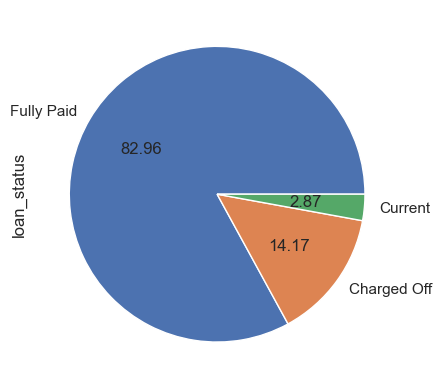

In [531]:
#82.96% customer has paid the loan fully while 14.17% customer are defaulters leading to financial loss
df_after_dropped_cols.loan_status.value_counts().plot.pie(autopct='%.2f')

In [ ]:
df_after_dropped_cols.funded_amnt.plot.bar(x="funded_amnt",y="loan_status")

<AxesSubplot:>